# LIBRARIES IMPORT

In [1]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# IRIS DATASET IMPORT

In [2]:
iris = load_iris()
#iris.data

In [3]:
X = iris.data[:, :2]
#X

# SKLEARN

In [4]:
n_clusters = 3
random_state = 130

In [5]:
model = KMeans(n_clusters = n_clusters, random_state = random_state).fit(X)
y_pred_skl = model.predict(X)

# CUSTOM

In [6]:
from k_means_class import kmeans

In [7]:
modele = kmeans()

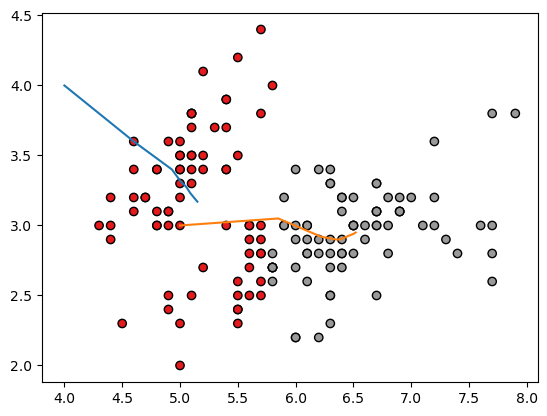

In [8]:
modele.fit(X, k = 3, plot=True)

# MODELS COMPARISON

In [9]:
y_pred = modele.predict(X)
#y_pred

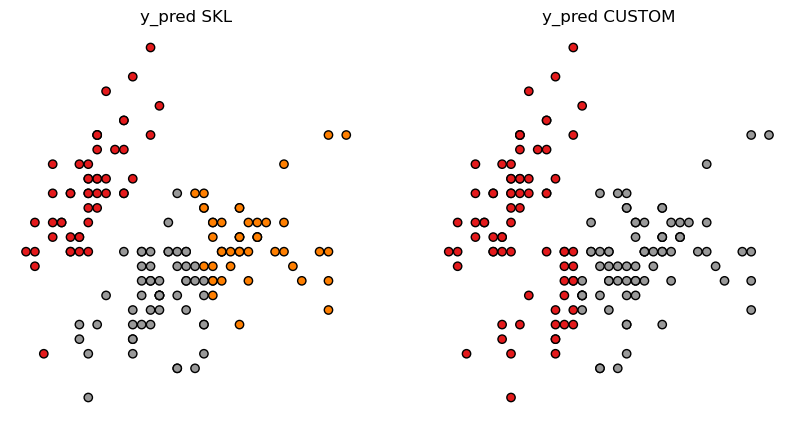

In [10]:
plt.figure(figsize=(10, 5))

ax = plt.subplot(1, 2, 1)

plt.title('y_pred SKL')
plt.axis("off")

plt.scatter(X[:, 0], X[:, 1], c=y_pred_skl, cmap=plt.cm.Set1, edgecolor="k")


ax = plt.subplot(1, 2, 2)

plt.title('y_pred CUSTOM')
plt.axis("off")

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1, edgecolor="k")

plt.show()

## METRICS

In [11]:
from sklearn import metrics
clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
for metric in clustering_metrics:
  score = metric(y_pred_skl, model.labels_)
  print(f"The {metric.__name__} score is {round(score, 3)} ")

The homogeneity_score score is 1.0 
The completeness_score score is 1.0 
The v_measure_score score is 1.0 
The adjusted_rand_score score is 1.0 
The adjusted_mutual_info_score score is 1.0 


In [12]:
for metric in clustering_metrics:
  score = metric(y_pred, model.labels_)
  print(f"The {metric.__name__} score is {round(score, 3)} ")

The homogeneity_score score is 0.649 
The completeness_score score is 0.41 
The v_measure_score score is 0.502 
The adjusted_rand_score score is 0.415 
The adjusted_mutual_info_score score is 0.499 


In [13]:
#model.labels_

In [14]:
eb10 = modele.elbow(X, 10)
#eb10

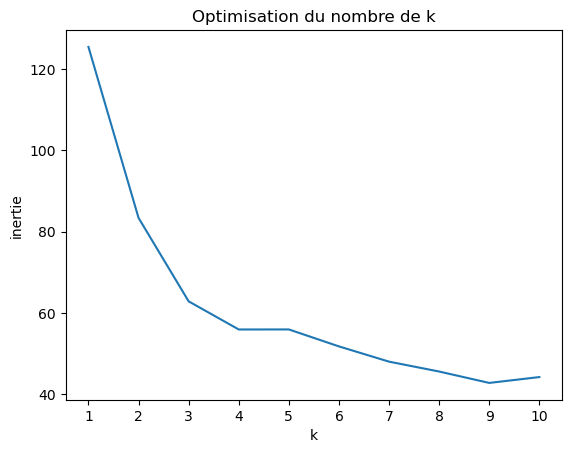

In [15]:
plt.plot(range(1, 11), eb10)
plt.xticks(range(1, 11))
plt.xlabel ('k')
plt.ylabel ('inertie')
plt.title ('Optimisation du nombre de k')
plt.show()